# Logistic Regression


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Logistic Regression](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Loading and visualizing the data](#2.2)
  - [ 2.3  Sigmoid function](#2.3)
  - [ 2.4 Cost function for logistic regression](#2.4)
  - [ 2.5 Gradient for logistic regression](#2.5)
  - [ 2.6 Learning parameters using gradient descent ](#2.6)
  - [ 2.7 Evaluating logistic regression](#2.7)
- [ 3 - Regularized Logistic Regression](#3)
  - [ 3.1 Feature mapping](#3.1)
  - [ 3.2 Cost function for regularized logistic regression](#3.2)
  - [ 3.3 Gradient for regularized logistic regression](#3.3)
  - [ 3.4 Learning parameters using gradient descent](#3.4)
  - [ 3.5 Evaluating regularized logistic regression model](#3.5)


## <a name="1"></a>
## 1 - Packages 

- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

## <a name="2"></a>
## 2 - Logistic Regression



<a name="2.1"></a>
### 2.1 Problem Statement

This project aims to build a logistic regression model to determine whether microchips should be accepted or rejected based on their test results. We will use a dataset of past microchip test results to develop the model, which will provide a practical solution for determining the acceptance or rejection of microchips in a factory setting. By working on this project, we will gain insights into the application of logistic regression models and enhance our skills in data analysis and machine learning.

<a name="2.2"></a>
### 2.2 Loading and visualizing the data

- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains the test results for the microchips from two tests
  - `y_train` contains the results of the QA  
      - `y_train = 1` if the microchip was accepted 
      - `y_train = 0` if the microchip was rejected 
  - Both `X_train` and `y_train` are numpy arrays.

In [2]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [4]:
# load dataset
X_train, y_train = load_data("microchips.txt")

#### View the variables


In [5]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>


In [6]:

print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of the variables


In [7]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


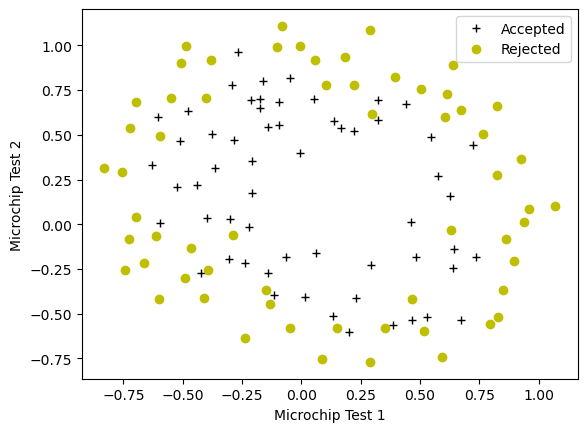

In [8]:

def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    
    # Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

### <a name="2.3"></a>
### 2.3  Sigmoid function


In [9]:
def sigmoid(z):
   
    g = 1/(1+np.exp(-z))
   
    return g


### <a name="2.4"></a>
### 2.4 Cost function for logistic regression


In [10]:
def compute_cost(X, y, w, b, *argv):
   
    m, n = X.shape
    
    
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

    return total_cost

In [11]:
m, n = X_train.shape

# Display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


### <a name="2.5"></a>
### 2.5 Gradient for logistic regression


In [12]:
def compute_gradient(X, y, w, b, lambda_=None): 
   
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m    
    
        
    return dj_db, dj_dw

In [13]:
#Display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):0.00847457627118644
dj_dw at initial w and b (zeros):[0.01878809322033899, 7.777118644068388e-05]


### <a name="2.6"></a>
### 2.6 Learning parameters using gradient descent 


In [14]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
   
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

#### Run the gradient descent algorithm above to learn the parameters for our datase

In [15]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.93   
Iteration 1000: Cost     3.68   
Iteration 2000: Cost     3.43   
Iteration 3000: Cost     3.18   
Iteration 4000: Cost     2.94   
Iteration 5000: Cost     2.69   
Iteration 6000: Cost     2.45   
Iteration 7000: Cost     2.21   
Iteration 8000: Cost     1.97   
Iteration 9000: Cost     1.75   
Iteration 9999: Cost     1.54   


### <a name="2.7"></a>
### 2.7 Evaluating logistic regression


In [16]:
def predict(X, w, b): 
    
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
   
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
   
    return p

In [17]:
# Test predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')


Output of predict: shape (4,), value [0. 1. 1. 1.]


In [18]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 50.847458


### <a name="3"></a>
## 3 - Regularized Logistic Regression


### <a name="3.1"></a>
### 3.1 Feature mapping


In [19]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [20]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [21]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


### <a name="3.2"></a>
### 3.2 Cost function for regularized logistic regression

In [22]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    
    m, n = X.shape
    
    # Calls the compute_cost function 
    cost_without_reg = compute_cost(X, y, w, b) 
    
    
    reg_cost = 0.
    
   
    
    reg_cost = sum(np.square(w))    
    
    
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [23]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6618252552483948


### <a name="3.3"></a>
### 3.3 Gradient for regularized logistic regression

In [24]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

        
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
              
        
    return dj_db, dj_dw

In [25]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )


dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]


### <a name="3.4"></a>
### 3.4 Learning parameters using gradient descent

In [26]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ 
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


### <a name="3.5"></a>
### 3.5 Evaluating regularized logistic regression model


In [27]:
#Compute accuracy on the training set
p = predict(mapped_X, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
